In [ ]:
import numpy as np
print(np.__version__)
import torch
print(torch.__version__)
import torch.nn.functional as F
import matplotlib.pylab as plt

1.21.6
1.12.0+cu113


# Linear Regression

you will train 1D linear regresion model with PyTorch by using data that you created. <br>The model has two parameters: the slope `x` and bias `b`.

Model: $ y = wx+b $

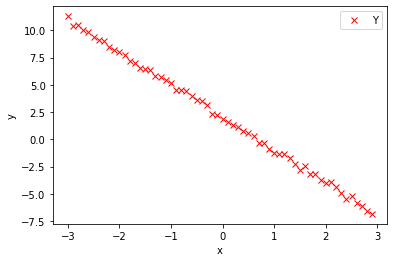

In [ ]:
# Create the f(X) with a slope of -3
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X + 2
# Add some noise to f(X) and save it in Y
Y = f + 0.2 * torch.randn(X.size())

# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Your Task** (Step 1):  Initialize Model: $w=2,b=-1$


In [ ]:
# Define w = 2 and b = -1 for y = wx + b
# Note that w,b are learnable paramteter 
# i.e., you are going to take the derivative of the tensor(s).
# YOUR CODE STARTS HERE
w = torch.tensor(2.0, requires_grad= True)
b = torch.tensor(-1.0, requires_grad= True)
# YOUR CODE ENDS HERE

assert w.item() == 2
assert b.item() == -1
assert w.requires_grad == True
assert b.requires_grad == True

**Your Task** (Step 2): Define the function <code>forward(x, w, b)</code> makes the prediction as $y=wx+b$

In [ ]:
def forward(x,w = w,b = b):
    # YOUR CODE STARTS HERE
    yhat = w*x + b
    # YOUR CODE ends HERE
    return yhat

# test: Try to make the prediction for multiple inputs: x1=1.0 and x2=2.0
x = torch.tensor([[1.0], [2.0]])
print("The shape of x: ", x.shape)
yhat = forward(x)
print("The prediction: ", yhat)

assert yhat[0].item() == 1 # at x=1, predicted value should be 1
assert yhat[1].item() == 3 # at x=2, predicted value should be 3

The shape of x:  torch.Size([2, 1])
The prediction:  tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)


**Your Task** (Step 3): Define the cost or criterion function using MSE (Mean Square Error): 

In [ ]:
# Create the MSE function for evaluate the result.
def criterion(yhat, y):
    # YOUR CODE STARTS HERE
    loss = torch.mean((yhat - y) ** 2)
    # YOUR CODE ends HERE
    return loss

# test cases:
y_true = torch.tensor([3, -0.5, 2, 7])
y_pred = torch.tensor([2.5, 0.0, 2, 8])
loss = criterion(y_pred,y_true)

assert loss.item() == 0.375

**Your Task** (Step 4): Train your model

In [ ]:
# Define a function for train the model
LOSS = []
def train_model(iter):
    for epoch in range(iter):
        
        # YOUR CODE STARTS HERE
        # make the prediction as we learned in the last lab
        # input data: X
        Yhat = forward(X, w, b)
        
        # calculate the loss between prediction Yhat and GT Y
        loss = criterion(Yhat, Y)
        
        # store the loss into list
        LOSS.append(loss.detach().numpy())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters with learnign rate alpha=0.001
        # w = w - alpha * w_grad
        # b = b - alpha * b_grad
        w.data = w.data - 0.001 * w.grad.data
        b.data = b.data - 0.001 * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()
        # YOUR CODE ENDS HERE


Text(20.75, 0.5, 'Cost')

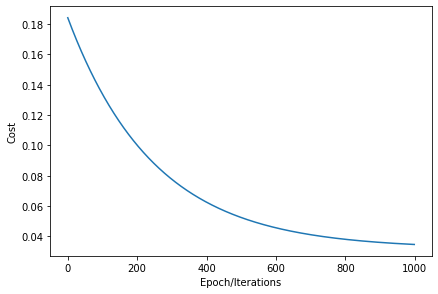

In [ ]:
train_model(1000)

# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

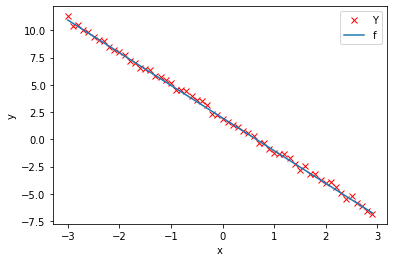

In [ ]:
# Plot the data points
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')
y_pred = forward(X)
plt.plot(X.numpy(), y_pred.detach().numpy(), label = 'f')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
print(f'True parameters: w=-3 and b=2')
print(f'Predicted parameters: w={w.data} and b={b.data}')

True parameters: w=-3 and b=2
Predicted parameters: w=-2.9975955486297607 and b=1.9531341791152954
